In [1]:
import pandas as pd
from scipy.stats import chi2
import numpy as np
import warnings
import copy
import itertools
import seaborn as sns
warnings.filterwarnings("ignore")

## Discretization of the whole set into 37, 74, and 148 states

In [2]:
def descritezation37(df):
    df['Val']=df['Val']*4
    df['Down']=df['Down']*4
    df['Up']=df['Up']*4
    df = df.round({'Val':0, 'Down':0, 'Up':0})
    return df

In [3]:
def descritezation74(df):
    df['Val']=df['Val']*8
    df['Down']=df['Down']*8
    df['Up']=df['Up']*8
    df = df.round({'Val':0, 'Down':0, 'Up':0})
    return df

In [4]:
def descritezation148(df):
    df['Val']=df['Val']*16
    df['Down']=df['Down']*16
    df['Up']=df['Up']*16
    df = df.round({'Val':0, 'Down':0, 'Up':0})
    return df

## Discretization of the current period set into 37, 74, and 148 states

In [5]:
def round_array(val, lst):
    return lst[np.argmin(np.abs(lst - val))]

In [6]:
def descritezation_37_each_period(df):
    mmin = min(min(df['Down']),min(df['Val']))
    mmax = max(max(df['Up']),max(df['Val']))
    round_lst = np.linspace(mmin, mmax, num=37)
    df["Val"] = df["Val"].apply(lambda x: round_array(x, round_lst))
    df["Up"] = df["Up"].apply(lambda x: round_array(x, round_lst))
    df["Down"] = df["Down"].apply(lambda x: round_array(x, round_lst))
    dct = {k: v for k, v in zip(np.linspace(mmin, mmax, 37), np.arange(1, 38, 1))}
    return df

In [7]:
def descritezation_74_each_period(df):
    mmin = min(min(df['Down']),min(df['Val']))
    mmax = max(max(df['Up']),max(df['Val']))
    round_lst = np.linspace(mmin, mmax, num=74)
    df["Val"] = df["Val"].apply(lambda x: round_array(x, round_lst))
    df["Up"] = df["Up"].apply(lambda x: round_array(x, round_lst))
    df["Down"] = df["Down"].apply(lambda x: round_array(x, round_lst))
    return df

In [8]:
def descritezation_148_each_period(df):
    mmin = min(min(df['Down']),min(df['Val']))
    mmax = max(max(df['Up']),max(df['Val']))
    round_lst = np.linspace(mmin, mmax, num=148)
    df["Val"] = df["Val"].apply(lambda x: round_array(x, round_lst))
    df["Up"] = df["Up"].apply(lambda x: round_array(x, round_lst))
    df["Down"] = df["Down"].apply(lambda x: round_array(x, round_lst))
    return df

## Discretization of the current period set into 37, 74, and 148 states w/o border

In [9]:
def descritezation_37_each_period_without_border(df):
    mmin = min(df['Val'])
    mmax = max(df['Val'])
    round_lst = np.linspace(mmin, mmax, num=37)
    df["Val"] = df["Val"].apply(lambda x: round_array(x, round_lst))
    df["Up"] = df["Up"].apply(lambda x: round_array(x, round_lst))
    df["Down"] = df["Down"].apply(lambda x: round_array(x, round_lst))
    return df

In [10]:
def descritezation_74_each_period_without_border(df):
    mmin = min(df['Val'])
    mmax = max(df['Val'])
    round_lst = np.linspace(mmin, mmax, num=74)
    df["Val"] = df["Val"].apply(lambda x: round_array(x, round_lst))
    df["Up"] = df["Up"].apply(lambda x: round_array(x, round_lst))
    df["Down"] = df["Down"].apply(lambda x: round_array(x, round_lst))
    return df

In [11]:
def descritezation_148_each_period_without_border(df):
    mmin = min(df['Val'])
    mmax = max(df['Val'])
    round_lst = np.linspace(mmin, mmax, num=148)
    df["Val"] = df["Val"].apply(lambda x: round_array(x, round_lst))
    df["Up"] = df["Up"].apply(lambda x: round_array(x, round_lst))
    df["Down"] = df["Down"].apply(lambda x: round_array(x, round_lst))
    return df

## Tranzition probability matrix generation

In [12]:
def dict_for_tpm_37(df):
    mmin = min(df['Val'])
    mmax = max(df['Val'])
    dct = {k: v for k, v in zip(np.linspace(mmin, mmax, 37), np.arange(1, 38, 1))}
    return dct

In [13]:
def dict_for_tpm_74(df):
    mmin = min(df['Val'])
    mmax = max(df['Val'])
    dct = {k: v for k, v in zip(np.linspace(mmin, mmax, 74), np.arange(1, 75, 1))}
    return dct

In [14]:
def dict_for_tpm_148(df):
    mmin = min(df['Val'])
    mmax = max(df['Val'])
    dct = {k: v for k, v in zip(np.linspace(mmin, mmax, 148), np.arange(1, 149, 1))}
    return dct

In [15]:
def transition_matrix(transitions):
    n = 1+ max(transitions)

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

## Set normalization

In [16]:
def norm(df):
    temp = min(min(df['Down']),min(df['Val']))
    df['Val']=df['Val']-temp
    df['Down']=df['Down']-temp
    df['Up']=df['Up']-temp
    return df

## Representation of a chain as a matrix of sequential states

In [17]:
def view(df):
    temp = df.copy()
    temp['step1']=temp['Val'].shift(-1)
    temp['step2']=temp['Val'].shift(-2)
    return temp

## Splitting the chain into time intervals

In [18]:
def period(df,year1,month1,day1,year2,month2,day2):
    temp = df[(df['Date'] >= str(year1) + '-' + str(month1) + '-' + str(day1)) & (df['Date'] <= str(year2) + '-' + str(month2) + '-' + str(day2))]
    return temp

## Сalculating chain frequencies

In [19]:
def freq(df):
    
    temp = df.copy()
    value=temp.sort_values('Val').Val.drop_duplicates().reset_index()
    
    freq_i =temp.groupby('Val').count().reset_index()
    freq_i.drop(['Date', 'Up','step1','step2'], axis='columns', inplace=True)
    freq_i.rename(columns={'Down': 'Count_freq_i'}, inplace=True)
    
    freq_ij=temp.groupby(['Val','step1']).count().reset_index()
    freq_ij.drop(['Date', 'Up','step2'], axis='columns', inplace=True)
    freq_ij.rename(columns={'Down': 'Count_freq_ij'}, inplace=True)
    
    freq_ij2=temp.groupby(['Val','step1','step2']).count().reset_index()
    freq_ij2.drop(['Date', 'Up',], axis='columns', inplace=True)
    freq_ij2.rename(columns={'Down': 'Count_freq_ij2'}, inplace=True)
    
    freq_j=temp.groupby('step1').count().reset_index()
    freq_j.drop(['Date', 'Up','Val','step2'], axis='columns', inplace=True)
    freq_j.rename(columns={'Down': 'Count_freq_j'}, inplace=True)
    
    freq_0i0=temp.groupby('step1').count().reset_index()
    freq_0i0.drop(['Date', 'Up','Val','step2'], axis='columns', inplace=True)
    freq_0i0.rename(columns={'Down': 'Count_freq_0i0'}, inplace=True)
    
    freq_0ij=temp.groupby(['step1','step2']).count().reset_index()
    freq_0ij.drop(['Date', 'Up','Val'], axis='columns', inplace=True)
    freq_0ij.rename(columns={'Down': 'Count_freq_0ij'}, inplace=True)
    
    return freq_i,freq_ij,freq_ij2,freq_j,freq_0i0,freq_0ij

In [20]:
def freq0(df):
    
    temp = df.copy()
    value=temp.sort_values('Val').Val.drop_duplicates().reset_index()
    
    freq_i =temp.groupby('Val').count().reset_index()
    freq_i.drop(['Date', 'Up','step1','step2'], axis='columns', inplace=True)
    freq_i.rename(columns={'Down': 'freq0'}, inplace=True)
    freq_i.freq0 = 0
    
    freq_ij=temp.groupby(['Val','step1']).count().reset_index()
    freq_ij.drop(['Date', 'Up','step2'], axis='columns', inplace=True)
    freq_ij.rename(columns={'Down': 'freq0'}, inplace=True)
    freq_ij.freq0 = 0
    
    freq_ij2=temp.groupby(['Val','step1','step2']).count().reset_index()
    freq_ij2.drop(['Date', 'Up',], axis='columns', inplace=True)
    freq_ij2.rename(columns={'Down': 'freq0'}, inplace=True)
    freq_ij2.freq0 = 0
    
    freq_j=temp.groupby('step1').count().reset_index()
    freq_j.drop(['Date', 'Up','Val','step2'], axis='columns', inplace=True)
    freq_j.rename(columns={'Down': 'freq0'}, inplace=True)
    freq_j.freq0 = 0
    
    freq_0i0=temp.groupby('step1').count().reset_index()
    freq_0i0.drop(['Date', 'Up','Val','step2'], axis='columns', inplace=True)
    freq_0i0.rename(columns={'Down': 'freq0'}, inplace=True)
    freq_0i0.freq0 = 0
    
    freq_0ij=temp.groupby(['step1','step2']).count().reset_index()
    freq_0ij.drop(['Date', 'Up','Val'], axis='columns', inplace=True)
    freq_0ij.rename(columns={'Down': 'freq0'}, inplace=True)
    freq_0ij.freq0 = 0
    
    return freq_i,freq_ij,freq_ij2,freq_j,freq_0i0,freq_0ij

## Сalculating statistics to test the independence hypothesis

In [21]:
def independent(temp, conf):
    N=len(temp.sort_values('Val').Val.drop_duplicates())
    n=len(temp)
    freq_i,freq_ij,freq_ij2,freq_j,freq_0i0,freq_0ij = freq(temp)
    h=temp[['Val','step1']].merge(freq_i,how='left', on='Val',suffixes=['','_freq_i']).merge(freq_j,how='left', on='step1',suffixes=['','_freq_j']).merge(freq_ij,how='left', on=['Val','step1'],suffixes=['','_freq_ij']).drop_duplicates()
    h=h.fillna(0) 
    h['t']=(h.Count_freq_ij-h.Count_freq_i*h.Count_freq_j/n)**2/(h.Count_freq_i*h.Count_freq_j/n)
    t=h.t.sum()
    t_chi=chi2.ppf(conf, ((N**1-1)*(N-1)) )
    return t,t_chi

In [22]:
def independent_full(temp, conf, full_temp):
    N=len(temp.sort_values('Val').Val.drop_duplicates())
    freq_i,freq_ij,freq_ij2,freq_j,freq_0i0,freq_0ij = freq(temp)
    ffreq_i,ffreq_ij,ffreq_ij2,ffreq_j,ffreq_0i0,ffreq_0ij = freq0(full_temp)
    test = pd.merge(freq_ij, ffreq_ij, how="outer", on=["Val", "step1"])
    test = test.fillna(0)
    test.drop(['freq0'], axis='columns', inplace=True)
    temp = test
    n=len(temp)

    h=temp[['Val','step1']].merge(freq_i,how='left', on='Val',suffixes=['','_freq_i']).merge(freq_j,how='left', on='step1',suffixes=['','_freq_j']).merge(freq_ij,how='left', on=['Val','step1'],suffixes=['','_freq_ij']).drop_duplicates()
    h=h.fillna(0) 
    h['t']=(h.Count_freq_ij-h.Count_freq_i*h.Count_freq_j/n)**2/((h.Count_freq_i*h.Count_freq_j/n))
    t=h.t.sum()
    t_chi=chi2.ppf(conf, ((N**1-1)*(N-1)) )
    return t,t_chi

## Сalculating statistics to test chain order hypothesis

In [23]:
def order1(temp, conf):
    freq_i,freq_ij,freq_ij2,freq_j,freq_0i0,freq_0ij = freq(temp)
    h=temp[['Val','step1', 'step2']].merge(freq_ij2,how='left',on=['Val', 'step1', 'step2'],suffixes=['','freq_ij2'])
    h=h.merge(freq_0i0, how='left', on='step1', suffixes=['','_0i0'])
    h=h.merge(freq_0ij,how='left',on=['step1', 'step2'],suffixes=['','freq_0ij'])
    h=h.merge(freq_ij ,how='left',on=['Val','step1'],suffixes=['','freq_ij'])
    h=h.merge(freq_i, how='left',on=['Val'],suffixes=['','freq_i']).drop_duplicates().rename(columns={'val':'val freq_ij2'})
    N = len(temp.sort_values('Val').Val.drop_duplicates())
    h['t']=(h.Count_freq_ij-h.Count_freq_i*h.Count_freq_0ij/h.Count_freq_0i0)**2/(h.Count_freq_i*h.Count_freq_0ij/h.Count_freq_0i0)
    t = h.t.sum()
    t_chi = chi2.ppf(conf, ((N**2-N**1)*(N-1)) )
    return t,t_chi

##  Сalculating statistics to test the uniformity hypothesis

In [24]:
def uniform(temp, conf):
    f1=temp[temp.index<temp.index[0] + len(temp)//2]
    f2=temp[temp.index>=temp.index[0] + len(temp)//2]
    N = len(temp.Val.drop_duplicates())
    d = len(temp[["Val","step1"]].drop_duplicates())
    freq_i,freq_ij,freq_ij2,freq_j,freq_0i0,freq_0ij = freq(f1)
    h1 = f1[['Val','step1']].merge(freq_i,how='left',on=['Val'],suffixes=['','freq_i']).merge(freq_ij,how='left',on=['Val','step1'],suffixes=['','freq_ij']).drop_duplicates()
    freq_i,freq_ij,freq_ij2,freq_j,freq_0i0,freq_0ij = freq(f2)
    h2 = f2[['Val','step1']].merge(freq_i,how='left',on=['Val'],suffixes=['','freq_i']).merge(freq_ij,how='left',on=['Val','step1'],suffixes=['','freq_ij']).drop_duplicates()
    freq_i,freq_ij,freq_ij2,freq_j,freq_0i0,freq_0ij = freq(temp)
    h10 = h1.merge(freq_i,how='left',on=['Val'],suffixes=['','freq_i0']).merge(freq_ij,how='left',on=['Val','step1'],suffixes=['','freq_ij0']).drop_duplicates()
    h20 = h2.merge(freq_i,how='left',on=['Val'],suffixes=['','freq_i0']).merge(freq_ij,how='left',on=['Val','step1'],suffixes=['','freq_ij0']).drop_duplicates()
    h10['t'] = h10.Count_freq_ij*np.log(h10.Count_freq_ij*h10.Count_freq_ifreq_i0/(h10.Count_freq_i*h10.Count_freq_ijfreq_ij0))
    h20['t'] = h20.Count_freq_ij*np.log(h20.Count_freq_ij*h20.Count_freq_ifreq_i0/(h20.Count_freq_i*h20.Count_freq_ijfreq_ij0))
    t = h10.t.sum()+h20.t.sum()
    t_chi = chi2.ppf(conf, (d-N)*(2-1))
    return t,t_chi

## Построение промежуточных выводов о всех гипотезах

In [25]:
data = pd.read_excel('Data.xlsx')
data['Date'] = pd.to_datetime(data['Date'],format="%d.%m.%Y")
Dates = pd.read_excel('Dates_samples.xlsx')
Full_data = data.copy(deep=True)

In [26]:
Dates['D37/K99/independent'] = 0
Dates['D37/K99/order1'] = 0
Dates['D37/K99/uniform'] = 0

Dates['D37/K95/independent'] = 0
Dates['D37/K95/order1'] = 0
Dates['D37/K95/uniform'] = 0

Dates['D37wb/K99/independent'] = 0
Dates['D37wb/K99/order1'] = 0
Dates['D37wb/K99/uniform'] = 0

Dates['D37wb/K95/independent'] = 0
Dates['D37wb/K95/order1'] = 0
Dates['D37wb/K95/uniform'] = 0

Dates['D37wob/K99/independent'] = 0
Dates['D37wob/K99/order1'] = 0
Dates['D37wob/K99/uniform'] = 0

Dates['D37wob/K95/independent'] = 0
Dates['D37wob/K95/order1'] = 0
Dates['D37wob/K95/uniform'] = 0



Dates['D74/K99/independent'] = 0
Dates['D74/K99/order1'] = 0
Dates['D74/K99/uniform'] = 0

Dates['D74/K95/independent'] = 0
Dates['D74/K95/order1'] = 0
Dates['D74/K95/uniform'] = 0

Dates['D74wb/K99/independent'] = 0
Dates['D74wb/K99/order1'] = 0
Dates['D74wb/K99/uniform'] = 0

Dates['D74wb/K95/independent'] = 0
Dates['D74wb/K95/order1'] = 0
Dates['D74wb/K95/uniform'] = 0

Dates['D74wob/K99/independent'] = 0
Dates['D74wob/K99/order1'] = 0
Dates['D74wob/K99/uniform'] = 0

Dates['D74wob/K95/independent'] = 0
Dates['D74wob/K95/order1'] = 0
Dates['D74wob/K95/uniform'] = 0



Dates['D148/K99/independent'] = 0
Dates['D148/K99/order1'] = 0
Dates['D148/K99/uniform'] = 0

Dates['D148/K95/independent'] = 0
Dates['D148/K95/order1'] = 0
Dates['D148/K95/uniform'] = 0

Dates['D148wb/K99/independent'] = 0
Dates['D148wb/K99/order1'] = 0
Dates['D148wb/K99/uniform'] = 0

Dates['D148wb/K95/independent'] = 0
Dates['D148wb/K95/order1'] = 0
Dates['D148wb/K95/uniform'] = 0

Dates['D148wob/K99/independent'] = 0
Dates['D148wob/K99/order1'] = 0
Dates['D148wob/K99/uniform'] = 0

Dates['D148wob/K95/independent'] = 0
Dates['D148wob/K95/order1'] = 0
Dates['D148wob/K95/uniform'] = 0



Dates['D37/K99'] = 0
Dates['D37/K95'] = 0
Dates['D37wb/K99'] = 0
Dates['D37wb/K95'] = 0
Dates['D37wob/K99'] = 0
Dates['D37wob/K95'] = 0

Dates['D74/K99'] = 0
Dates['D74/K95'] = 0
Dates['D74wb/K99'] = 0
Dates['D74wb/K95'] = 0
Dates['D74wob/K99'] = 0
Dates['D74wob/K95'] = 0

Dates['D148/K99'] = 0
Dates['D148/K95'] = 0
Dates['D148wb/K99'] = 0
Dates['D148wb/K95'] = 0
Dates['D148wob/K99'] = 0
Dates['D148wob/K95'] = 0




Dates['D37/independent'] = 0
Dates['D37wb/independent'] = 0
Dates['D37wob/independent'] = 0

Dates['D74/independent'] = 0
Dates['D74wb/independent'] = 0
Dates['D74wob/independent'] = 0

Dates['D148/independent'] = 0
Dates['D148wb/independent'] = 0
Dates['D148wob/independent'] = 0

In [27]:
Dates

,Year1,Month1,Day1,Year2,Month2,Day2,Type,D37/K99/independent,D37/K99/order1,D37/K99/uniform,...,D148wob/K95,D37/independent,D37wb/independent,D37wob/independent,D74/independent,D74wb/independent,D74wob/independent,D148/independent,D148wb/independent,D148wob/independent
0,2009,6,5,2009,7,5,Month,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2009,8,1,2009,9,1,Month,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2010,1,10,2010,2,10,Month,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011,3,10,2011,4,10,Month,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012,2,10,2012,3,10,Month,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2012,1,15,2013,1,15,Year,0,0,0,...,0,0,0,0,0,0,0,0,0,0
166,2009,2,27,2010,2,26,Year,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,2010,2,27,2011,2,26,Year,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168,2011,2,27,2012,2,26,Year,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
for i in range (len(Dates.index)):
    data = Full_data.copy(deep=True)
    temp = descritezation37(data)
    temp = norm(temp)
    temp = period(temp,Dates.iloc[i].Year1, Dates.iloc[i].Month1, Dates.iloc[i].Day1,Dates.iloc[i].Year2, Dates.iloc[i].Month2, Dates.iloc[i].Day2)
    temp = view(temp)
    
    t, t_chi = independent(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D37/K99/independent')] = 1

    t, t_chi = order1(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D37/K99/order1')] = 1
    
    t, t_chi = uniform(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D37/K99/uniform')] = 1

for i in range (len(Dates.index)):
    data = Full_data.copy(deep=True)
    temp = descritezation37(data)
    temp = norm(temp)
    temp = period(temp,Dates.iloc[i].Year1, Dates.iloc[i].Month1, Dates.iloc[i].Day1,Dates.iloc[i].Year2, Dates.iloc[i].Month2, Dates.iloc[i].Day2)
    temp = view(temp)
    
    t, t_chi = independent(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D37/K95/independent')] = 1

    t, t_chi = order1(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D37/K95/order1')] = 1
        
    t, t_chi = uniform(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D37/K95/uniform')] = 1
        

for i in range (len(Dates.index)):
    
    data = Full_data.copy(deep=True)
    
    temp = norm(data)
    temp = period(temp,Dates.iloc[i].Year1, Dates.iloc[i].Month1, Dates.iloc[i].Day1,Dates.iloc[i].Year2, Dates.iloc[i].Month2, Dates.iloc[i].Day2)
    temp = descritezation_37_each_period(temp)
    temp = view(temp)
    
    t, t_chi = independent(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D37wb/K99/independent')] = 1

    t, t_chi = order1(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D37wb/K99/order1')] = 1
        
    t, t_chi = uniform(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D37wb/K99/uniform')] = 1
        
for i in range (len(Dates.index)):
    
    data = Full_data.copy(deep=True)
    
    temp = norm(data)
    temp = period(temp,Dates.iloc[i].Year1, Dates.iloc[i].Month1, Dates.iloc[i].Day1,Dates.iloc[i].Year2, Dates.iloc[i].Month2, Dates.iloc[i].Day2)
    temp = descritezation_37_each_period(temp)
    temp = view(temp)
    
    t, t_chi = independent(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D37wb/K95/independent')] = 1

    t, t_chi = order1(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D37wb/K95/order1')] = 1
        
    t, t_chi = uniform(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D37wb/K95/uniform')] = 1
        
for i in range (len(Dates.index)):
    
    data = Full_data.copy(deep=True)
    
    temp = norm(data)
    temp = period(temp,Dates.iloc[i].Year1, Dates.iloc[i].Month1, Dates.iloc[i].Day1,Dates.iloc[i].Year2, Dates.iloc[i].Month2, Dates.iloc[i].Day2)
    temp = descritezation_37_each_period_without_border(temp)
    temp = view(temp)
    
    t, t_chi = independent(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D37wob/K99/independent')] = 1

    t, t_chi = order1(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D37wob/K99/order1')] = 1
        
    t, t_chi = uniform(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D37wob/K99/uniform')] = 1
        
for i in range (len(Dates.index)):
    
    data = Full_data.copy(deep=True)
    
    temp = norm(data)
    temp = period(temp,Dates.iloc[i].Year1, Dates.iloc[i].Month1, Dates.iloc[i].Day1,Dates.iloc[i].Year2, Dates.iloc[i].Month2, Dates.iloc[i].Day2)
    temp = descritezation_37_each_period_without_border(temp)
    temp = view(temp)
    
    t, t_chi = independent(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D37wob/K95/independent')] = 1

    t, t_chi = order1(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D37wob/K95/order1')] = 1
        
    t, t_chi = uniform(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D37wob/K95/uniform')] = 1

In [29]:
for i in range (len(Dates.index)):
    data = Full_data.copy(deep=True)
    temp = descritezation74(data)
    temp = norm(temp)
    temp = period(temp,Dates.iloc[i].Year1, Dates.iloc[i].Month1, Dates.iloc[i].Day1,Dates.iloc[i].Year2, Dates.iloc[i].Month2, Dates.iloc[i].Day2)
    temp = view(temp)
    
    t, t_chi = independent(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D74/K99/independent')] = 1

    t, t_chi = order1(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D74/K99/order1')] = 1
    
    t, t_chi = uniform(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D74/K99/uniform')] = 1

for i in range (len(Dates.index)):
    data = Full_data.copy(deep=True)
    temp = descritezation74(data)
    temp = norm(temp)
    temp = period(temp,Dates.iloc[i].Year1, Dates.iloc[i].Month1, Dates.iloc[i].Day1,Dates.iloc[i].Year2, Dates.iloc[i].Month2, Dates.iloc[i].Day2)
    temp = view(temp)
    
    t, t_chi = independent(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D74/K95/independent')] = 1

    t, t_chi = order1(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D74/K95/order1')] = 1
        
    t, t_chi = uniform(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D74/K95/uniform')] = 1
        

for i in range (len(Dates.index)):
    
    data = Full_data.copy(deep=True)
    
    temp = norm(data)
    temp = period(temp,Dates.iloc[i].Year1, Dates.iloc[i].Month1, Dates.iloc[i].Day1,Dates.iloc[i].Year2, Dates.iloc[i].Month2, Dates.iloc[i].Day2)
    temp = descritezation_74_each_period(temp)
    temp = view(temp)
    
    t, t_chi = independent(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D74wb/K99/independent')] = 1

    t, t_chi = order1(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D74wb/K99/order1')] = 1
        
    t, t_chi = uniform(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D74wb/K99/uniform')] = 1
        
for i in range (len(Dates.index)):
    
    data = Full_data.copy(deep=True)
    
    temp = norm(data)
    temp = period(temp,Dates.iloc[i].Year1, Dates.iloc[i].Month1, Dates.iloc[i].Day1,Dates.iloc[i].Year2, Dates.iloc[i].Month2, Dates.iloc[i].Day2)
    temp = descritezation_74_each_period(temp)
    temp = view(temp)
    
    t, t_chi = independent(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D74wb/K95/independent')] = 1

    t, t_chi = order1(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D74wb/K95/order1')] = 1
        
    t, t_chi = uniform(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D74wb/K95/uniform')] = 1
        
for i in range (len(Dates.index)):
    
    data = Full_data.copy(deep=True)
    
    temp = norm(data)
    temp = period(temp,Dates.iloc[i].Year1, Dates.iloc[i].Month1, Dates.iloc[i].Day1,Dates.iloc[i].Year2, Dates.iloc[i].Month2, Dates.iloc[i].Day2)
    temp = descritezation_74_each_period_without_border(temp)
    temp = view(temp)
    
    t, t_chi = independent(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D74wob/K99/independent')] = 1

    t, t_chi = order1(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D74wob/K99/order1')] = 1
        
    t, t_chi = uniform(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D74wob/K99/uniform')] = 1
        
for i in range (len(Dates.index)):
    
    data = Full_data.copy(deep=True)
    
    temp = norm(data)
    temp = period(temp,Dates.iloc[i].Year1, Dates.iloc[i].Month1, Dates.iloc[i].Day1,Dates.iloc[i].Year2, Dates.iloc[i].Month2, Dates.iloc[i].Day2)
    temp = descritezation_74_each_period_without_border(temp)
    temp = view(temp)
    
    t, t_chi = independent(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D74wob/K95/independent')] = 1

    t, t_chi = order1(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D74wob/K95/order1')] = 1
        
    t, t_chi = uniform(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D74wob/K95/uniform')] = 1

In [30]:
for i in range (len(Dates.index)):
    data = Full_data.copy(deep=True)
    temp = descritezation148(data)
    temp = norm(temp)
    temp = period(temp,Dates.iloc[i].Year1, Dates.iloc[i].Month1, Dates.iloc[i].Day1,Dates.iloc[i].Year2, Dates.iloc[i].Month2, Dates.iloc[i].Day2)
    temp = view(temp)
    
    t, t_chi = independent(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D148/K99/independent')] = 1

    t, t_chi = order1(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D148/K99/order1')] = 1
    
    t, t_chi = uniform(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D148/K99/uniform')] = 1

for i in range (len(Dates.index)):
    data = Full_data.copy(deep=True)
    temp = descritezation148(data)
    temp = norm(temp)
    temp = period(temp,Dates.iloc[i].Year1, Dates.iloc[i].Month1, Dates.iloc[i].Day1,Dates.iloc[i].Year2, Dates.iloc[i].Month2, Dates.iloc[i].Day2)
    temp = view(temp)
    
    t, t_chi = independent(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D148/K95/independent')] = 1

    t, t_chi = order1(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D148/K95/order1')] = 1
        
    t, t_chi = uniform(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D148/K95/uniform')] = 1
        

for i in range (len(Dates.index)):
    
    data = Full_data.copy(deep=True)
    
    temp = norm(data)
    temp = period(temp,Dates.iloc[i].Year1, Dates.iloc[i].Month1, Dates.iloc[i].Day1,Dates.iloc[i].Year2, Dates.iloc[i].Month2, Dates.iloc[i].Day2)
    temp = descritezation_148_each_period(temp)
    temp = view(temp)
    
    t, t_chi = independent(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D148wb/K99/independent')] = 1

    t, t_chi = order1(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D148wb/K99/order1')] = 1
        
    t, t_chi = uniform(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D148wb/K99/uniform')] = 1
        
for i in range (len(Dates.index)):
    
    data = Full_data.copy(deep=True)
    
    temp = norm(data)
    temp = period(temp,Dates.iloc[i].Year1, Dates.iloc[i].Month1, Dates.iloc[i].Day1,Dates.iloc[i].Year2, Dates.iloc[i].Month2, Dates.iloc[i].Day2)
    temp = descritezation_148_each_period(temp)
    temp = view(temp)
    
    t, t_chi = independent(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D148wb/K95/independent')] = 1

    t, t_chi = order1(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D148wb/K95/order1')] = 1
        
    t, t_chi = uniform(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D148wb/K95/uniform')] = 1
        
for i in range (len(Dates.index)):
    
    data = Full_data.copy(deep=True)
    
    temp = norm(data)
    temp = period(temp,Dates.iloc[i].Year1, Dates.iloc[i].Month1, Dates.iloc[i].Day1,Dates.iloc[i].Year2, Dates.iloc[i].Month2, Dates.iloc[i].Day2)
    temp = descritezation_148_each_period_without_border(temp)
    temp = view(temp)
    
    t, t_chi = independent(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D148wob/K99/independent')] = 1

    t, t_chi = order1(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D148wob/K99/order1')] = 1
        
    t, t_chi = uniform(temp,0.99)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D148wob/K99/uniform')] = 1
        
for i in range (len(Dates.index)):
    
    data = Full_data.copy(deep=True)
    
    temp = norm(data)
    temp = period(temp,Dates.iloc[i].Year1, Dates.iloc[i].Month1, Dates.iloc[i].Day1,Dates.iloc[i].Year2, Dates.iloc[i].Month2, Dates.iloc[i].Day2)
    temp = descritezation_148_each_period_without_border(temp)
    temp = view(temp)
    
    t, t_chi = independent(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D148wob/K95/independent')] = 1

    t, t_chi = order1(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D148wob/K95/order1')] = 1
        
    t, t_chi = uniform(temp,0.95)
    if t > t_chi:
        Dates.iloc[i, Dates.columns.get_loc('D148wob/K95/uniform')] = 1

## Построение финальных выводов

In [31]:
for i in range (len(Dates.index)):
    
    if (Dates.iloc[i, Dates.columns.get_loc('D37/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D37/K99/independent')] == 1):
        if (Dates.iloc[i, Dates.columns.get_loc('D37/K95/order1')] == 0):
            if (Dates.iloc[i, Dates.columns.get_loc('D37/K95/uniform')] == 0):
                Dates.iloc[i, Dates.columns.get_loc('D37/K95')] = 1
                
    if (Dates.iloc[i, Dates.columns.get_loc('D37/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D37/K99/independent')] == 1):
        if (Dates.iloc[i, Dates.columns.get_loc('D37/K99/order1')] == 0):
            if (Dates.iloc[i, Dates.columns.get_loc('D37/K99/uniform')] == 0):
                Dates.iloc[i, Dates.columns.get_loc('D37/K99')] = 1
        
        
    if (Dates.iloc[i, Dates.columns.get_loc('D37wb/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D37wb/K99/independent')] == 1):
        if (Dates.iloc[i, Dates.columns.get_loc('D37wb/K95/order1')] == 0):
            if (Dates.iloc[i, Dates.columns.get_loc('D37wb/K95/uniform')] == 0):
                Dates.iloc[i, Dates.columns.get_loc('D37wb/K95')] = 1
                
    if (Dates.iloc[i, Dates.columns.get_loc('D37wb/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D37wb/K99/independent')] == 1):
        if (Dates.iloc[i, Dates.columns.get_loc('D37wb/K99/order1')] == 0):
            if (Dates.iloc[i, Dates.columns.get_loc('D37wb/K99/uniform')] == 0):
                Dates.iloc[i, Dates.columns.get_loc('D37wb/K99')] = 1

                
    if (Dates.iloc[i, Dates.columns.get_loc('D37wob/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D37wob/K99/independent')] == 1):
        if (Dates.iloc[i, Dates.columns.get_loc('D37wob/K95/order1')] == 0):
            if (Dates.iloc[i, Dates.columns.get_loc('D37wob/K95/uniform')] == 0):
                Dates.iloc[i, Dates.columns.get_loc('D37wob/K95')] = 1
                
    if (Dates.iloc[i, Dates.columns.get_loc('D37wob/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D37wob/K99/independent')] == 1):
        if (Dates.iloc[i, Dates.columns.get_loc('D37wob/K99/order1')] == 0):
            if (Dates.iloc[i, Dates.columns.get_loc('D37wob/K99/uniform')] == 0):
                Dates.iloc[i, Dates.columns.get_loc('D37wob/K99')] = 1

In [32]:
for i in range (len(Dates.index)):
    
    if (Dates.iloc[i, Dates.columns.get_loc('D74/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D74/K99/independent')] == 1):
        if (Dates.iloc[i, Dates.columns.get_loc('D74/K95/order1')] == 0):
            if (Dates.iloc[i, Dates.columns.get_loc('D74/K95/uniform')] == 0):
                Dates.iloc[i, Dates.columns.get_loc('D74/K95')] = 1
                
    if (Dates.iloc[i, Dates.columns.get_loc('D74/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D74/K99/independent')] == 1):
        if (Dates.iloc[i, Dates.columns.get_loc('D74/K99/order1')] == 0):
            if (Dates.iloc[i, Dates.columns.get_loc('D74/K99/uniform')] == 0):
                Dates.iloc[i, Dates.columns.get_loc('D74/K99')] = 1
        
        
    if (Dates.iloc[i, Dates.columns.get_loc('D74wb/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D74wb/K99/independent')] == 1):
        if (Dates.iloc[i, Dates.columns.get_loc('D74wb/K95/order1')] == 0):
            if (Dates.iloc[i, Dates.columns.get_loc('D74wb/K95/uniform')] == 0):
                Dates.iloc[i, Dates.columns.get_loc('D74wb/K95')] = 1
                
    if (Dates.iloc[i, Dates.columns.get_loc('D74wb/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D74wb/K99/independent')] == 1):
        if (Dates.iloc[i, Dates.columns.get_loc('D74wb/K99/order1')] == 0):
            if (Dates.iloc[i, Dates.columns.get_loc('D74wb/K99/uniform')] == 0):
                Dates.iloc[i, Dates.columns.get_loc('D74wb/K99')] = 1

                
    if (Dates.iloc[i, Dates.columns.get_loc('D74wob/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D74wob/K99/independent')] == 1):
        if (Dates.iloc[i, Dates.columns.get_loc('D74wob/K95/order1')] == 0):
            if (Dates.iloc[i, Dates.columns.get_loc('D74wob/K95/uniform')] == 0):
                Dates.iloc[i, Dates.columns.get_loc('D74wob/K95')] = 1
                
    if (Dates.iloc[i, Dates.columns.get_loc('D74wob/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D74wob/K99/independent')] == 1):
        if (Dates.iloc[i, Dates.columns.get_loc('D74wob/K99/order1')] == 0):
            if (Dates.iloc[i, Dates.columns.get_loc('D74wob/K99/uniform')] == 0):
                Dates.iloc[i, Dates.columns.get_loc('D74wob/K99')] = 1

In [33]:
for i in range (len(Dates.index)):
    
    if (Dates.iloc[i, Dates.columns.get_loc('D148/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D148/K99/independent')] == 1):
        if (Dates.iloc[i, Dates.columns.get_loc('D148/K95/order1')] == 0):
            if (Dates.iloc[i, Dates.columns.get_loc('D148/K95/uniform')] == 0):
                Dates.iloc[i, Dates.columns.get_loc('D148/K95')] = 1
                
    if (Dates.iloc[i, Dates.columns.get_loc('D148/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D148/K99/independent')] == 1):
        if (Dates.iloc[i, Dates.columns.get_loc('D148/K99/order1')] == 0):
            if (Dates.iloc[i, Dates.columns.get_loc('D148/K99/uniform')] == 0):
                Dates.iloc[i, Dates.columns.get_loc('D148/K99')] = 1
        
        
    if (Dates.iloc[i, Dates.columns.get_loc('D148wb/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D148wb/K99/independent')] == 1):
        if (Dates.iloc[i, Dates.columns.get_loc('D148wb/K95/order1')] == 0):
            if (Dates.iloc[i, Dates.columns.get_loc('D148wb/K95/uniform')] == 0):
                Dates.iloc[i, Dates.columns.get_loc('D148wb/K95')] = 1
                
    if (Dates.iloc[i, Dates.columns.get_loc('D148wb/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D148wb/K99/independent')] == 1):
        if (Dates.iloc[i, Dates.columns.get_loc('D148wb/K99/order1')] == 0):
            if (Dates.iloc[i, Dates.columns.get_loc('D148wb/K99/uniform')] == 0):
                Dates.iloc[i, Dates.columns.get_loc('D148wb/K99')] = 1

                
    if (Dates.iloc[i, Dates.columns.get_loc('D148wob/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D148wob/K99/independent')] == 1):
        if (Dates.iloc[i, Dates.columns.get_loc('D148wob/K95/order1')] == 0):
            if (Dates.iloc[i, Dates.columns.get_loc('D148wob/K95/uniform')] == 0):
                Dates.iloc[i, Dates.columns.get_loc('D148wob/K95')] = 1
                
    if (Dates.iloc[i, Dates.columns.get_loc('D148wob/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D148wob/K99/independent')] == 1):
        if (Dates.iloc[i, Dates.columns.get_loc('D148wob/K99/order1')] == 0):
            if (Dates.iloc[i, Dates.columns.get_loc('D148wob/K99/uniform')] == 0):
                Dates.iloc[i, Dates.columns.get_loc('D148wob/K99')] = 1

In [34]:
for i in range (len(Dates.index)):
    
    if (Dates.iloc[i, Dates.columns.get_loc('D37/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D37/K99/independent')] == 1):
            Dates.iloc[i, Dates.columns.get_loc('D37/independent')] = 1
        
    if (Dates.iloc[i, Dates.columns.get_loc('D37wb/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D37wb/K99/independent')] == 1):
            Dates.iloc[i, Dates.columns.get_loc('D37wb/independent')] = 1
            
    if (Dates.iloc[i, Dates.columns.get_loc('D37wob/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D37wob/K99/independent')] == 1):
            Dates.iloc[i, Dates.columns.get_loc('D37wob/independent')] = 1

In [35]:
for i in range (len(Dates.index)):
    
    if (Dates.iloc[i, Dates.columns.get_loc('D74/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D74/K99/independent')] == 1):
            Dates.iloc[i, Dates.columns.get_loc('D74/independent')] = 1
        
    if (Dates.iloc[i, Dates.columns.get_loc('D74wb/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D74wb/K99/independent')] == 1):
            Dates.iloc[i, Dates.columns.get_loc('D74wb/independent')] = 1
            
    if (Dates.iloc[i, Dates.columns.get_loc('D74wob/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D74wob/K99/independent')] == 1):
            Dates.iloc[i, Dates.columns.get_loc('D74wob/independent')] = 1

In [36]:
for i in range (len(Dates.index)):
    
    if (Dates.iloc[i, Dates.columns.get_loc('D148/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D148/K99/independent')] == 1):
            Dates.iloc[i, Dates.columns.get_loc('D148/independent')] = 1
        
    if (Dates.iloc[i, Dates.columns.get_loc('D148wb/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D148wb/K99/independent')] == 1):
            Dates.iloc[i, Dates.columns.get_loc('D148wb/independent')] = 1
            
    if (Dates.iloc[i, Dates.columns.get_loc('D148wob/K95/independent')] == 1 or
        Dates.iloc[i, Dates.columns.get_loc('D148wob/K99/independent')] == 1):
            Dates.iloc[i, Dates.columns.get_loc('D148wob/independent')] = 1

In [39]:
Dates

,Year1,Month1,Day1,Year2,Month2,Day2,Type,D37/K99/independent,D37/K99/order1,D37/K99/uniform,...,D148wob/K95,D37/independent,D37wb/independent,D37wob/independent,D74/independent,D74wb/independent,D74wob/independent,D148/independent,D148wb/independent,D148wob/independent
0,2009,6,5,2009,7,5,Month,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2009,8,1,2009,9,1,Month,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2010,1,10,2010,2,10,Month,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011,3,10,2011,4,10,Month,1,1,0,...,0,1,0,0,0,0,0,0,0,0
4,2012,2,10,2012,3,10,Month,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2012,1,15,2013,1,15,Year,1,0,0,...,1,1,1,1,1,1,1,1,1,1
166,2009,2,27,2010,2,26,Year,1,0,0,...,1,1,1,1,1,1,1,1,1,1
167,2010,2,27,2011,2,26,Year,1,0,0,...,1,1,1,1,1,1,1,1,1,1
168,2011,2,27,2012,2,26,Year,1,0,0,...,1,1,1,1,1,1,1,1,1,1


In [40]:
Dates.to_excel("Final_frame.xlsx")

In [65]:
data = pd.read_excel('Data.xlsx')
data['Date'] = pd.to_datetime(data['Date'],format="%d.%m.%Y")
Dates = pd.read_excel('Dates_samples.xlsx')
Full_data = data.copy(deep=True)

temp = norm(data)
temp = period(temp,2010,1,11,2011,9,25)
##temp = period(temp,2012,1,1,2013,12,1)
temp = descritezation_148_each_period_without_border(temp)
temp = view(temp)

dct1 = dict_for_tpm_148(temp)
temp['discrete_ch'] = temp['Val'].map(dct1)
arr_for_tpm = temp.discrete_ch.reset_index(drop=True)
arr_for_tpm=arr_for_tpm.to_frame()
tenki = arr_for_tpm.discrete_ch.values
m = transition_matrix(tenki)
df_mvp = pd.DataFrame(m)

In [62]:
df_mvp_1 = pd.DataFrame(m)

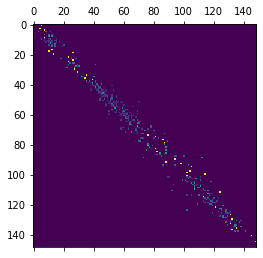

In [63]:
import matplotlib.pyplot as plt

plt.matshow(df_mvp_1)
plt.show()

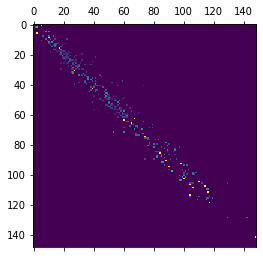

In [66]:
plt.matshow(df_mvp)
plt.show()

In [67]:
df_razn = abs(df_mvp - df_mvp_1)

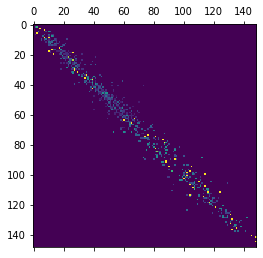

In [68]:
plt.matshow(df_razn)
plt.show()